Download some example data from github

In [1]:
import requests
import tarfile

for filename in ["plikHM_TTTEEE_lowl_lowE_lensing.tar.gz","plikHM_TTTEEE_lowl_lowE_lensing_NS.tar.gz"]:
    github_url = "https://github.com/williamjameshandley/cosmo_example/raw/master/"
    url = github_url + filename
    open(filename, 'wb').write(requests.get(url).content)
    tarfile.open(filename).extractall()

This downloaded the PLA chains for the planck baseline cosmology

In [2]:
import os
os.listdir('plikHM_TTTEEE_lowl_lowE_lensing')

['base_plikHM_TTTEEE_lowl_lowE_lensing_1.txt',
 'base_plikHM_TTTEEE_lowl_lowE_lensing.inputparams',
 'base_plikHM_TTTEEE_lowl_lowE_lensing.ranges',
 'base_plikHM_TTTEEE_lowl_lowE_lensing_2.txt',
 'base_plikHM_TTTEEE_lowl_lowE_lensing_4.txt',
 'base_plikHM_TTTEEE_lowl_lowE_lensing_3.txt',
 'base_plikHM_TTTEEE_lowl_lowE_lensing.paramnames']

And the equivalent nested sampling chains

In [3]:
os.listdir('plikHM_TTTEEE_lowl_lowE_lensing_NS')

['NS_plikHM_TTTEEE_lowl_lowE_lensing.ranges',
 'NS_plikHM_TTTEEE_lowl_lowE_lensing.inputparams',
 'NS_plikHM_TTTEEE_lowl_lowE_lensing.paramnames',
 'NS_plikHM_TTTEEE_lowl_lowE_lensing_dead-birth.txt']

Now import anesthetic and load the MCMC samples

In [4]:
from anesthetic.anesthetic import MCMCSamples
mcmc = MCMCSamples.read('plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing')

You can see that these are stored as a pandas array

In [5]:
print(mcmc)

      omegabh2  omegach2     theta       tau      logA        ns  calPlanck  \
0     0.022236  0.119022  1.040860  0.057732  3.044784  0.972823   0.999421   
1     0.022212  0.119042  1.040930  0.060019  3.050158  0.971052   0.999462   
2     0.022188  0.119034  1.040894  0.060375  3.050733  0.971215   0.999462   
3     0.022139  0.119490  1.041048  0.061047  3.053969  0.971959   1.000137   
4     0.022064  0.120595  1.040885  0.057995  3.048751  0.968957   0.999233   
5     0.022057  0.120610  1.040870  0.058543  3.049231  0.968699   0.999166   
6     0.022049  0.121040  1.040745  0.052749  3.039620  0.968896   0.999934   
7     0.022061  0.120794  1.040701  0.052524  3.038564  0.968817   0.999968   
8     0.021991  0.121282  1.040586  0.051732  3.038905  0.966863   1.000396   
9     0.022123  0.122407  1.040403  0.046539  3.029042  0.960863   0.997654   
10    0.022121  0.122415  1.040402  0.046479  3.028775  0.960633   0.997574   
11    0.022367  0.121828  1.040633  0.040175  3.0192

We have plotting tools for 1D plots ...

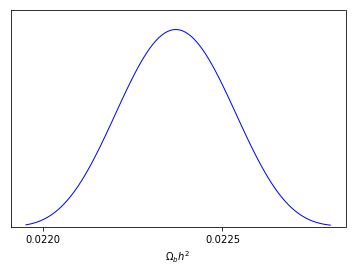

In [8]:
mcmc.plot_1d('omegabh2');

... multiple 1D plots ...

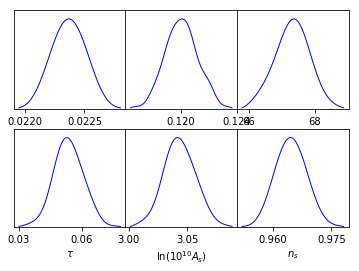

In [9]:
mcmc.plot_1d(['omegabh2','omegach2','H0','tau','logA','ns']);

... triangle plots (with the equivalent scatter plot filling up the left hand side) ...

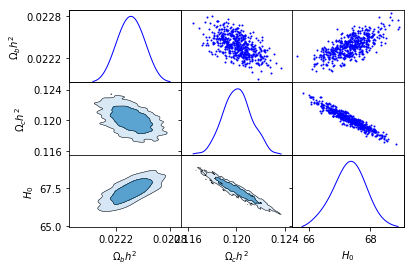

In [10]:
mcmc.plot_2d(['omegabh2','omegach2','H0']);

... and rectangle plots.

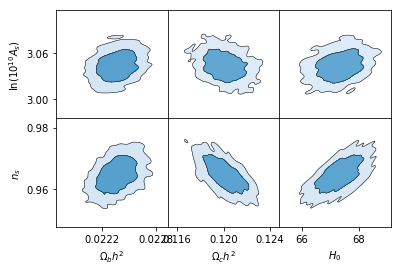

In [11]:
mcmc.plot_2d(['omegabh2','omegach2','H0'], ['logA', 'ns']);

Rectangle plots are pretty flexible with what they can do:

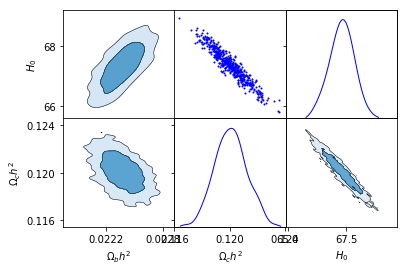

In [12]:
mcmc.plot_2d(['omegabh2','omegach2','H0'], ['H0','omegach2']);

More importantly, since this is a pandas array, we can redefine new parameters with relative ease.
 For example, the default cosmoMC setup does not include omegab, only omegabh2:

In [13]:
'omegab' in mcmc

False

However, this is pretty trivial to recompute:

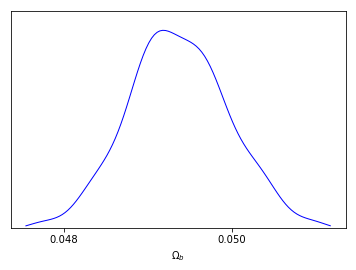

In [16]:
h = mcmc['H0']/100
mcmc['omegab'] = mcmc['omegabh2']/h**2
mcmc.tex['omegab'] = '$\Omega_b$'
mcmc.plot_1d('omegab');

Anethestic really comes to the fore for nested sampling. We can do all of
 the above, and more with the power that NS chains provide

In [17]:
from anesthetic.anesthetic import NestedSamples
nested = NestedSamples.read('plikHM_TTTEEE_lowl_lowE_lensing_NS/NS_plikHM_TTTEEE_lowl_lowE_lensing')

We can infer the evidence, KL divergence and Bayesian model dimensionality:

In [22]:
ns_output = nested.ns_output(1000)
print(ns_output)

             logZ          D          d
0   -12324.916531  38.989375  16.367011
1   -12325.325898  39.160844  16.844110
2   -12325.108190  39.040678  16.560073
3   -12324.769973  38.845030  16.471879
4   -12324.999976  38.958203  16.298043
5   -12325.073654  39.095834  16.519111
6   -12324.935603  38.946954  16.396327
7   -12325.361184  39.366235  16.487286
8   -12325.258496  39.199194  16.729178
9   -12325.077524  38.975955  17.348198
10  -12324.797596  38.868087  16.381646
11  -12324.877197  38.985101  16.244731
12  -12325.222298  39.263592  16.586670
13  -12325.469125  39.304790  17.758477
14  -12325.363412  39.258323  17.355457
15  -12325.543997  39.484559  16.742763
16  -12325.284474  39.088241  16.153692
17  -12325.157959  39.184722  16.542323
18  -12325.249130  39.164208  16.757104
19  -12325.040696  38.996653  16.426251
20  -12325.018128  39.045814  16.864229
21  -12325.004521  38.913059  16.684050
22  -12325.267097  39.261430  17.207981
23  -12325.109514  39.038576  16.782856


This is a set of MCMC samples that may be plotted as usual:

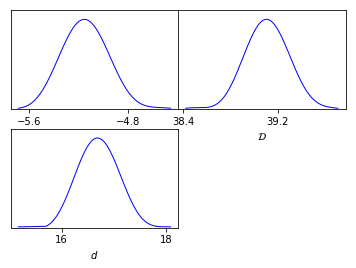

In [23]:
ns_output.plot_1d();

We can also inspect the correlation between these inferences:

(<Figure size 432x288 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ef1deaa58>]],
       dtype=object))

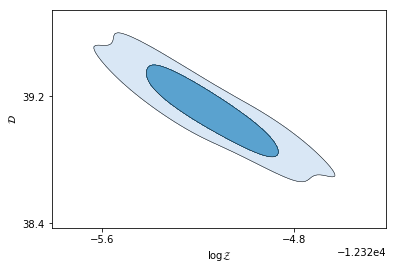

In [24]:
ns_output.plot_2d('logZ','D')

Here is a comparison of the base and NS output

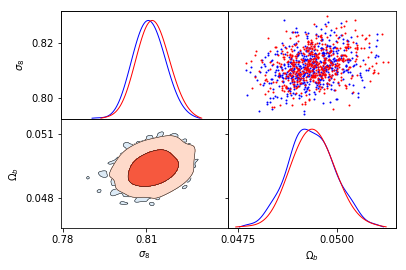

In [27]:
h = nested['H0']/100
nested['omegab'] = nested['omegabh2']/h**2
nested.tex['omegab'] = '$\Omega_b$'

fig, axes = mcmc.plot_2d(['sigma8','omegab'])
nested.plot_2d(['sigma8','omegab'], axes=axes, colorscheme='r');